In [3]:
# Importing the library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Importing the Data set

train_data = pd.read_csv('Google_Stock_Price_Train.csv')
test_data = pd.read_csv('Google_Stock_Price_Test.csv')

In [7]:
training_Set = train_data.iloc[:,1:2]
training_Set

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04
...,...
1253,790.90
1254,790.68
1255,793.70
1256,783.33


In [32]:
real_stock_price = test_data.iloc[:,1:2].values

In [9]:
# Feature scaling

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_Set_scaled = sc.fit_transform(training_Set)

In [11]:
# Creating the datastructure with 60 time step

X_train = []
y_train =[]
for i in range(60,1258):
    X_train.append(training_Set_scaled[i-60:i,0])
    y_train.append(training_Set_scaled[i,0])
X_train,y_train = np.array(X_train),np.array(y_train)

In [14]:
# Reshaping

X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [15]:
# Initioalizing The RNN

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [20]:
regressor = Sequential()

In [21]:
# Adding first LSTM Layer
regressor.add(LSTM(units=50,return_sequences=True,input_shape =(X_train.shape[1],1) ))

In [22]:
# Adding dropout regulariation to avoid overfitting

regressor.add(Dropout(0.2))



In [25]:
# Adding second LSTM Layer Adding dropout regulariation
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [27]:
# Adding third LSTM Layer Adding dropout regulariation
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [28]:
# Adding fourth LSTM Layer Adding dropout regulariation
regressor.add(LSTM(units=50,return_sequences=False))
regressor.add(Dropout(0.2))

In [29]:
# Adding Output layer 

regressor.add(Dense(units=1))

In [30]:
# Compiling the RNN

regressor.compile(optimizer='adam',loss='mean_squared_error')

In [31]:
# Fitting  the RNN to training set

regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 6s 145ms/step - loss: 0.0468
Epoch 2/100
38/38 [==============================] - 6s 165ms/step - loss: 0.0064
Epoch 3/100
38/38 [==============================] - 6s 151ms/step - loss: 0.0058
Epoch 4/100
38/38 [==============================] - 6s 162ms/step - loss: 0.0057
Epoch 5/100
38/38 [==============================] - 7s 190ms/step - loss: 0.0049
Epoch 6/100
38/38 [==============================] - 7s 171ms/step - loss: 0.0046
Epoch 7/100
38/38 [==============================] - 7s 182ms/step - loss: 0.0052
Epoch 8/100
38/38 [==============================] - 6s 166ms/step - loss: 0.0053
Epoch 9/100
38/38 [==============================] - 6s 165ms/step - loss: 0.0049
Epoch 10/100
38/38 [==============================] - 6s 171ms/step - loss: 0.0045
Epoch 11/100
38/38 [==============================] - 6s 166ms/step - loss: 0.0039
Epoch 12/100
38/38 [==============================] - 6s 155ms/step - loss: 0.0038
Epoch 13/100


38/38 [==============================] - 5s 136ms/step - loss: 0.0014
Epoch 100/100
38/38 [==============================] - 6s 145ms/step - loss: 0.0014


In [35]:
dataset_total = pd.concat((train_data['Open'],test_data['Open']),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_data)-60:].values
inputs=inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [37]:
X_test= []
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [38]:
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [39]:
# predicting

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [40]:
predicted_stock_price

array([[779.2876 ],
       [776.2469 ],
       [775.75964],
       [776.7825 ],
       [779.84344],
       [785.5106 ],
       [791.21716],
       [794.1218 ],
       [794.8277 ],
       [794.5815 ],
       [794.18646],
       [793.81067],
       [793.559  ],
       [793.98   ],
       [794.9062 ],
       [799.1324 ],
       [805.9677 ],
       [813.7072 ],
       [818.5743 ],
       [815.6392 ]], dtype=float32)

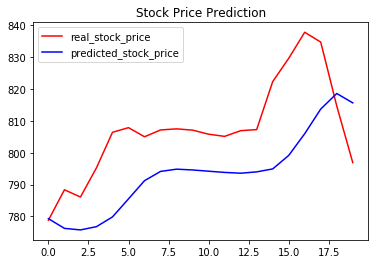

In [46]:
plt.plot(real_stock_price,color='red',label ='real_stock_price')
plt.plot(predicted_stock_price,color ='blue',label='predicted_stock_price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()

In [47]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

In [53]:
print('rmse value is : ',round(rmse,2))

rmse value is :  18.16
